# 13 October 2021

## **Practice Agglomerative Clustering  & DBScan**

## **Import libraries**

In [129]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward, complete, average

import warnings
warnings.filterwarnings('ignore')

## **Load & explore dataset**

In [130]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [131]:
# Rename columns
df = df.rename(columns={'Spending Score (1-100)': 'Spending Score',
        'Annual Income (k$)': 'Annual Income'})

In [132]:
# Drop customerID column
df.drop('CustomerID', axis=1, inplace=True)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual Income   200 non-null    int64 
 3   Spending Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [134]:
df.describe()

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [135]:
df.isna().sum()

Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

## **EDA**

Text(0.5, 1.0, 'Distribution of Age')

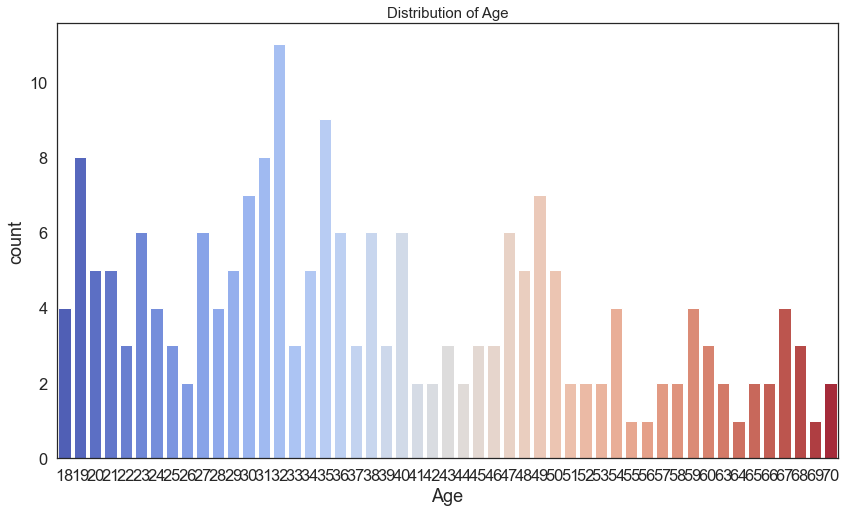

In [136]:
plt.figure(figsize=(14, 8))
sns.countplot(df['Age'], palette = 'coolwarm')
plt.title('Distribution of Age', fontsize = 15)

Text(0.5, 1.0, 'Distribution of Gender')

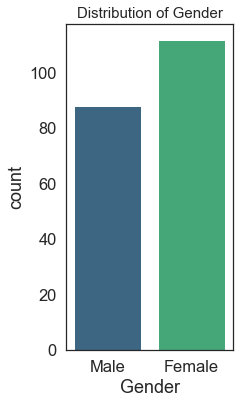

In [137]:
plt.figure(figsize=(3, 6))
sns.countplot(df['Gender'], palette = 'viridis')
plt.title('Distribution of Gender', fontsize = 15)

In [138]:
df['Gender'].value_counts()/df.shape[0]*100

Female    56.0
Male      44.0
Name: Gender, dtype: float64

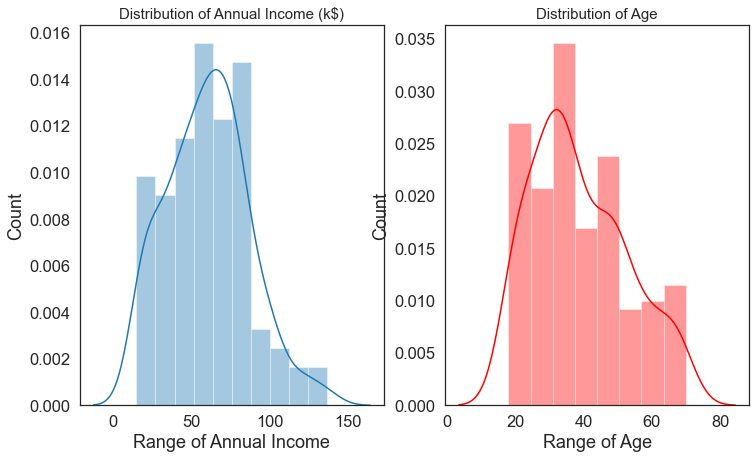

In [139]:
plt.figure(figsize=(12, 7))

plt.subplot(1, 2, 1)
sns.distplot(df['Annual Income'])
plt.title('Distribution of Annual Income (k$)', fontsize = 15)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Range of Age')
plt.ylabel('Count');

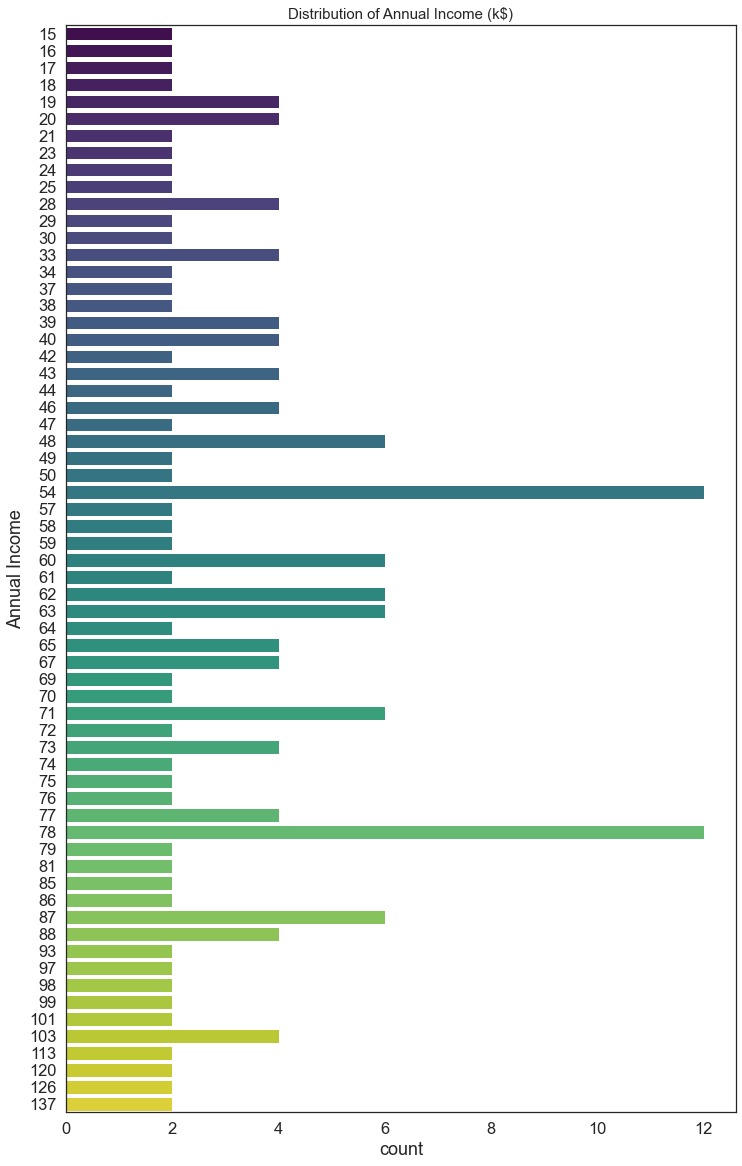

In [140]:
plt.figure(figsize=(12, 20))
sns.countplot(y='Annual Income', data=df, palette='viridis')
plt.title('Distribution of Annual Income (k$)', fontsize = 15);

Text(0.5, 1.0, 'Spending Score (1-100)')

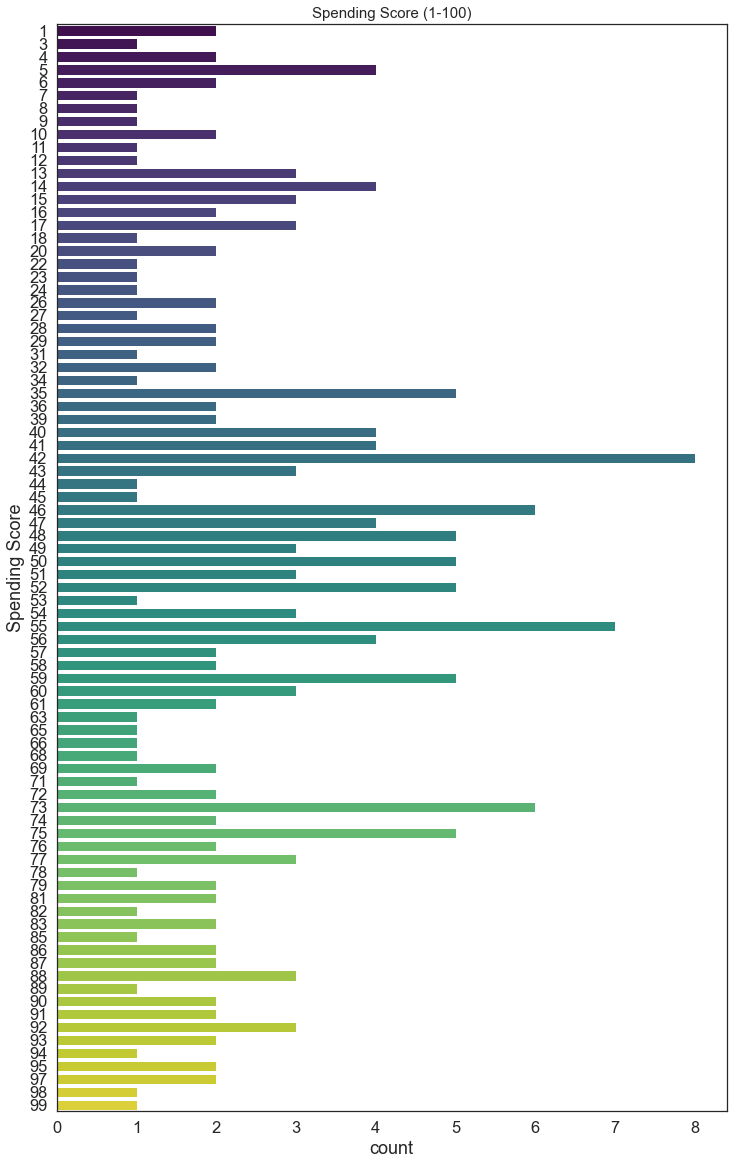

In [141]:
plt.figure(figsize=(12, 20))
sns.countplot(y='Spending Score', data=df, palette='viridis')
plt.title('Spending Score (1-100)', fontsize = 15)

### **Age vs Annual Income**

Text(0, 0.5, 'Annual Income (k$)')

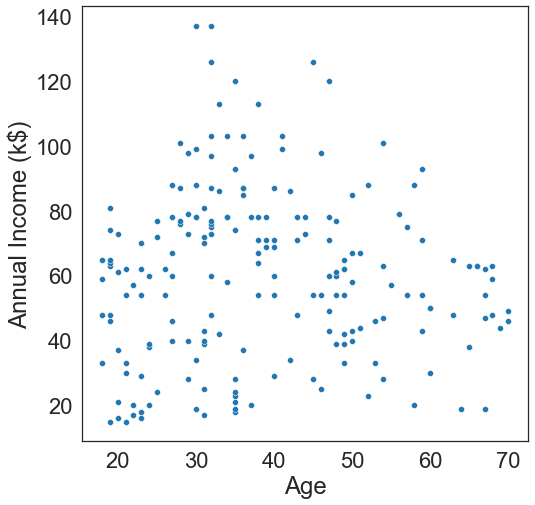

In [142]:
plt.figure(figsize = (8, 8))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Age', 
    y = 'Annual Income', 
    data = df)

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

### **Age vs Spending Score**

Text(0, 0.5, 'Spending Score (1-100)')

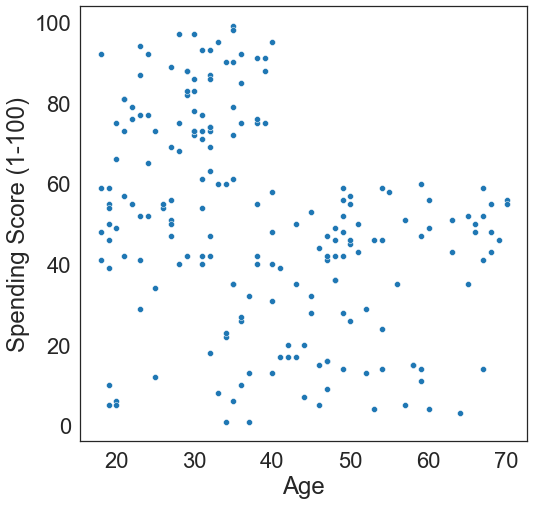

In [143]:
plt.figure(figsize = (8, 8))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Age', 
    y = 'Spending Score', 
    data = df)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

### **Annual Income vs Spending Score**

Text(0, 0.5, 'Spending Score (1-100)')

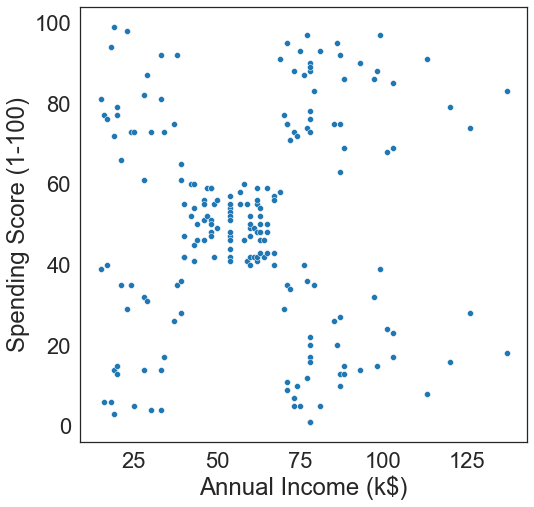

In [144]:
plt.figure(figsize = (8, 8))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Annual Income', 
    y = 'Spending Score', 
    data = df)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

## **Clustering**

Untuk tujuan clustering dengan metode yang akan digunakan, feature 'Gender' akan didrop karena merupakan categorical feature.

In [145]:
df = df.drop(columns='Gender', axis=1)
df.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## **Finding the best features combination**

## **Scaling**

In [146]:
df

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [147]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
X_scaled = pd.DataFrame(df_scaled, columns=['Age',	'Annual Income',	'Spending Score'])
X_scaled

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [148]:
import itertools

silhouette = []
score = 0
thislist = ['Age', 'Annual Income', 'Spending Score']

for i in itertools.combinations(thislist, 2):
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(df)
    labels = kmeans.labels_
    sil = silhouette_score(df, labels, metric = 'euclidean')
    silhouette.append(sil)

    if score < sil:
        best_combination = i
        score = sil

print(best_combination)
print(score)

('Age', 'Annual Income')
0.293166070535953


In [149]:
X = df[['Annual Income', 'Spending Score']]
X2 = df[['Age', 'Spending Score']]
X3 = df[['Age', 'Annual Income']]

cluster_list = [X, X2, X3]

for i in cluster_list:
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(i)
    labels = kmeans.labels_
    print('Silhoutte score:', silhouette_score(i, labels, metric = 'euclidean'))
    kmeans.labels_ = 'cluster', i

Silhoutte score: 0.2968969162503008
Silhoutte score: 0.4692341232501655
Silhoutte score: 0.42620850066216065


Because the silhouette score between 'Age' and 'Spending Score' is the highest, then for the next clustering process, only these 2 features will be used.

In [150]:
df = df.drop(columns='Annual Income', axis=1)
df.head()

,Age,Spending Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


## **K-Means**

### **Elbow method**

Text(0, 0.5, 'WCSS')

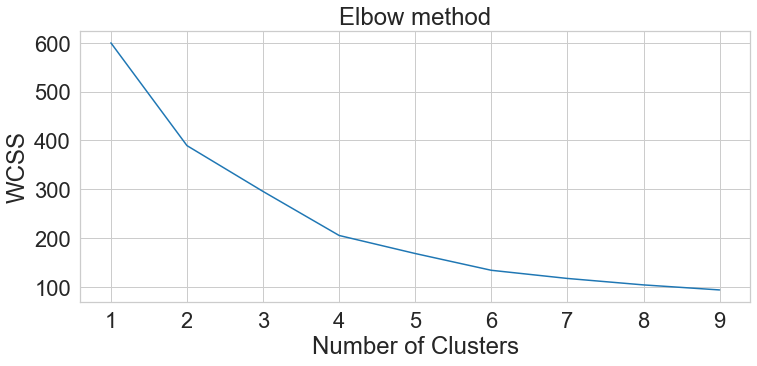

In [151]:
kmeans_models = [KMeans(n_clusters=k, random_state=0).fit(X_scaled) for k in range (1, 10)]
inertia = [model.inertia_ for model in kmeans_models]

sns.set_style(style='whitegrid')
plt.figure(figsize=(12, 5))
plt.plot(range(1, 10), inertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

Text(0, 0.5, 'Silhouette score')

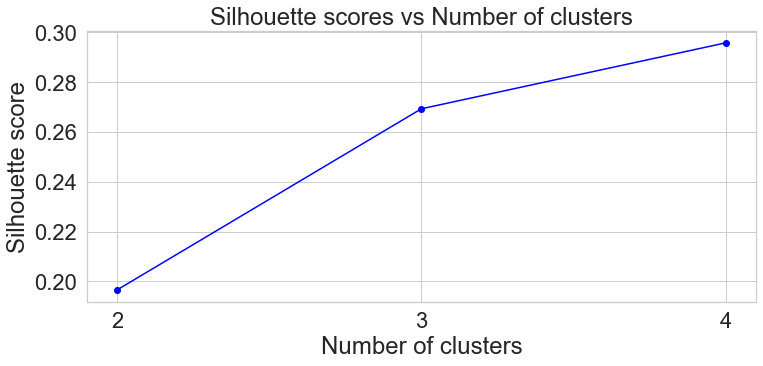

In [152]:
silhoutte_scores = [silhouette_score(X, model.labels_) for model in kmeans_models[2:5]]

plt.figure(figsize=(12, 5))
plt.plot(range(2, 5), silhoutte_scores, 'bo-')
plt.xticks([2, 3, 4])
plt.title('Silhouette scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

### **Silhouette method**

In [153]:
kmeans = KMeans(random_state=0)
kmeans.fit(X_scaled)

KMeans(random_state=0)

In [154]:
labels = kmeans.labels_
silhouette_score(X_scaled, labels, metric = 'euclidean', random_state=0)

0.40984180231920697

In [155]:
silhouette_scores = []
number_of_cluster = range(2, 11)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X_scaled)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(X_scaled, labels, metric = 'euclidean', random_state=0))

Text(0, 0.5, 'Silhouette score')

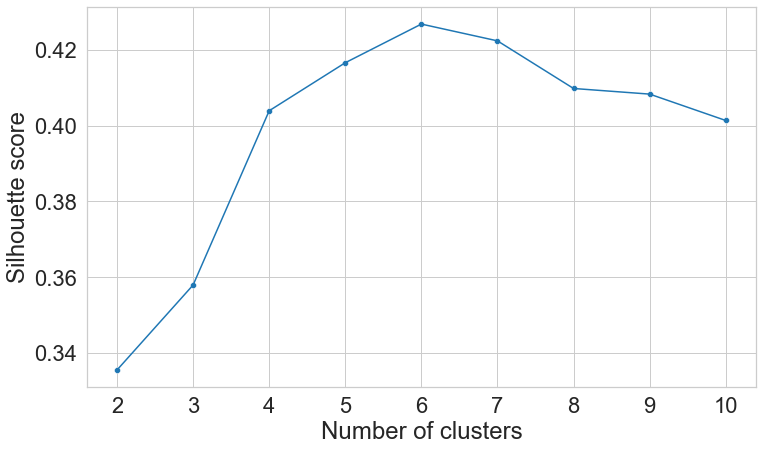

In [156]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xticks(number_of_cluster)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

### **Interpretation**

The highest Silhouette score is obtained with the number of clusters = 2.

In [157]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [158]:
df['clusters'] = kmeans.labels_
df

,Age,Spending Score,clusters
0,19,39,0
1,21,81,0
2,20,6,1
3,23,77,0
4,31,40,0
...,...,...,...
195,35,79,0
196,45,28,1
197,32,74,0
198,32,18,1


In [159]:
print('Silhouette score K-Means:', silhouette_score(X_scaled, kmeans.labels_))

Silhouette score K-Means: 0.33547192894004574


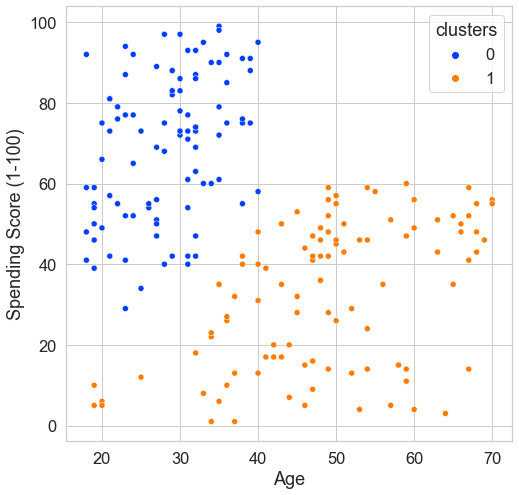

In [160]:
# Plotting the result
plt.figure(figsize = (8, 8) )
sns.set_context(context = 'notebook', font_scale=1.5)
sns.scatterplot(
    x = 'Age', 
    y = 'Spending Score', 
    hue = 'clusters',
    data = df,
    palette='bright')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)');

## **Agglomerative clustering**

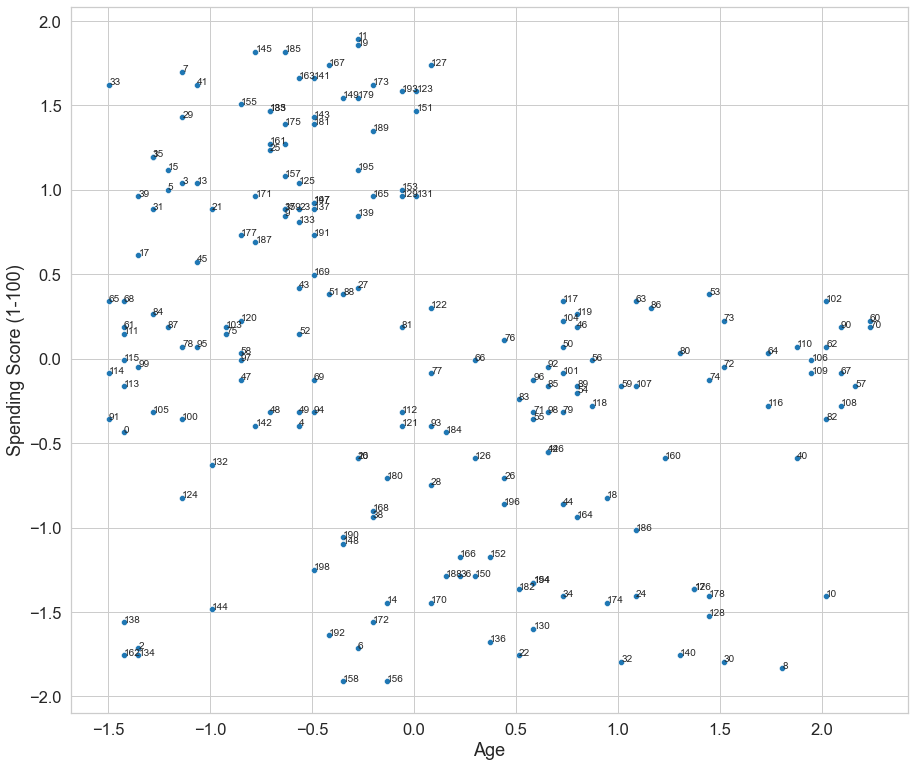

In [161]:
plt.figure(figsize=(15, 13))
sns.scatterplot(x='Age', y='Spending Score', data=X_scaled)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

for i,txt in enumerate(range(0,X_scaled.shape[0]-1)):
    plt.annotate(txt,(X_scaled['Age'][i], X_scaled['Spending Score'][i]), fontsize=10)

### **Ward**

Text(0, 0.5, 'Cluster distance')

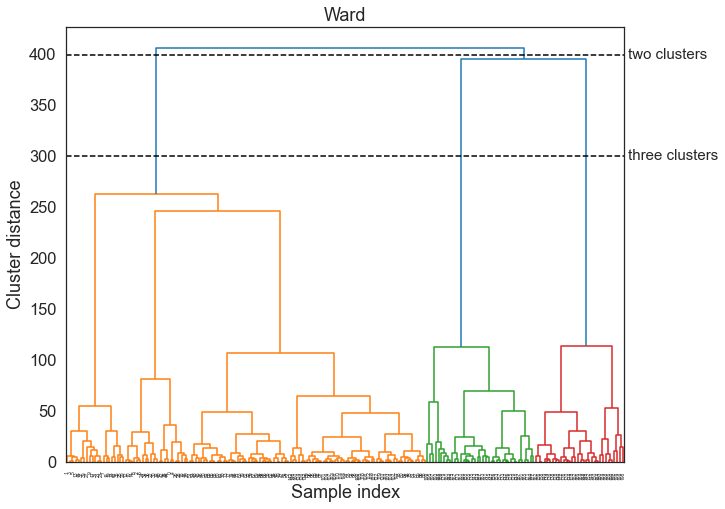

In [162]:
linkage_array = ward(X)

plt.figure(figsize = (10, 8))
sns.set_style(style='white')

dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [399, 399], '--', c='k')
ax.plot(bounds, [300, 300], '--', c='k')
ax.text(bounds[1], 399, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 300, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Ward')
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')

**Branch position**
- 2 clusters = 405
- 3 clusters = 398
- 4 clusters = 260
- 5 clusters = 248

**Change distance**
- 2-3 = 7
- 3-4 = 138
- 4-5 = 28

**Result: 3 most optimal clusters**

### **Complete**

Text(0, 0.5, 'Cluster distance')

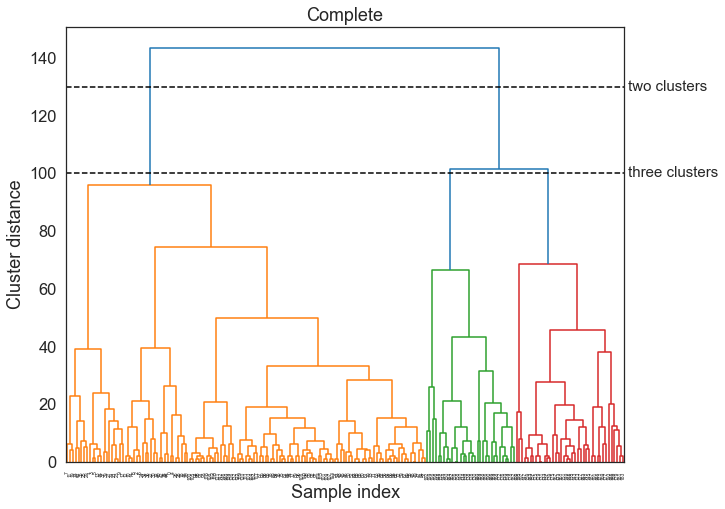

In [163]:
linkage_array = complete(X)

plt.figure(figsize = (10, 8))
sns.set_style(style='white')

dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [130, 130], '--', c='k')
ax.plot(bounds, [100, 100], '--', c='k')
ax.text(bounds[1], 130, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 100, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Complete')
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')

**Branch position**
- 2 clusters = 142
- 3 clusters = 103
- 4 clusters = 97
- 5 clusters = 75

**Change distance**
- 2-3 = 39
- 3-4 = 6
- 4-5 = 22

**Result: 2 most optimal clusters**

### **Average**

Text(0, 0.5, 'Cluster distance')

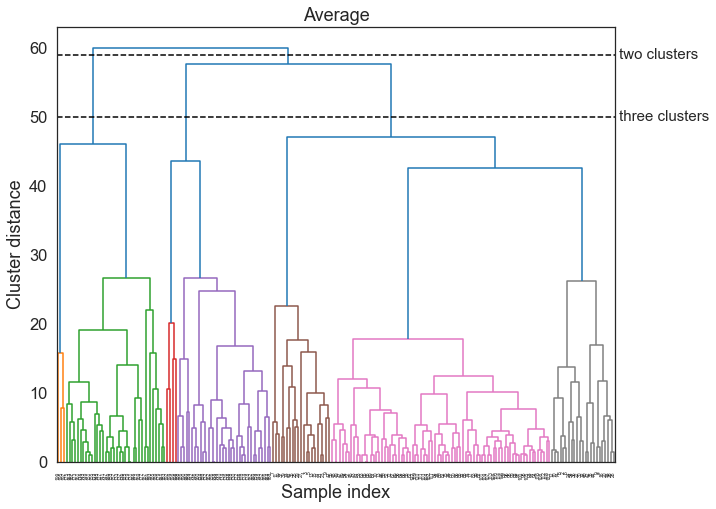

In [164]:
linkage_array = average(X)

plt.figure(figsize = (10, 8))
sns.set_style(style='white')

dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [59, 59], '--', c='k')
ax.plot(bounds, [50, 50], '--', c='k')
ax.text(bounds[1], 59, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 50, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Average')
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')

**Branch position**
- 2 clusters = 60
- 3 clusters = 56
- 4 clusters = 47
- 5 clusters = 46

**Change distance**
- 2-3 = 4
- 3-4 = 9
- 4-5 = 1

**Result: 3 most optimal clusters**

## **Results comparison**

**Cluster Number Selection**

- Selection of the number of clusters in agglomerative clustering can be selected subjectively (based on domain knowledge), or by choosing the largest distance change approach.

- From the dendrogram visualization of the 3 methods above, we get the candidate methods and clusters:
>- Ward: 3 clusters
>- Complete: 2 clusters
>- Average: 3 clusters

- Now we can compare and see the sillhoutte score is between 2 and 3 clusters. Which method and how many clusters is the best?

In [165]:
# Comparison of 2 clusters

agg_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
df['Ward2'] = agg_ward.fit_predict(X_scaled)

agg_complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
df['Complete2'] = agg_complete.fit_predict(X_scaled)

agg_average = AgglomerativeClustering(n_clusters=2, linkage='average')
df['Average2'] = agg_average.fit_predict(X_scaled)

df.head()

,Age,Spending Score,clusters,Ward2,Complete2,Average2
0,19,39,0,1,0,0
1,21,81,0,0,0,1
2,20,6,1,1,0,0
3,23,77,0,0,0,1
4,31,40,0,1,0,0


In [166]:
print('Silhouette score ward 2 clusters:', silhouette_score(X_scaled, df['Ward2']))
print('Silhouette score complete 2 clusters:', silhouette_score(X_scaled, df['Complete2']))
print('Silhouette score average 2 clusters:', silhouette_score(X_scaled, df['Average2']))

Silhouette score ward 2 clusters: 0.31795733680759597
Silhouette score complete 2 clusters: 0.23302480062700373
Silhouette score average 2 clusters: 0.3249364218857763


In [167]:
# Comparison of 3 clusters

agg_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Ward3'] = agg_ward.fit_predict(X_scaled)

agg_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
df['Complete3'] = agg_complete.fit_predict(X_scaled)

agg_average = AgglomerativeClustering(n_clusters=3, linkage='average')
df['Average3'] = agg_average.fit_predict(X_scaled)

df.head()

,Age,Spending Score,clusters,Ward2,Complete2,Average2,Ward3,Complete3,Average3
0,19,39,0,1,0,0,0,1,1
1,21,81,0,0,0,1,1,1,0
2,20,6,1,1,0,0,0,1,1
3,23,77,0,0,0,1,1,1,0
4,31,40,0,1,0,0,0,1,1


In [168]:
print('Silhouette score ward 3 clusters:', silhouette_score(X_scaled, df['Ward3']))
print('Silhouette score complete 3 clusters:', silhouette_score(X_scaled, df['Complete3']))
print('Silhouette score average 3 clusters:', silhouette_score(X_scaled, df['Average3']))

Silhouette score ward 3 clusters: 0.32148866683112387
Silhouette score complete 3 clusters: 0.28384379984299635
Silhouette score average 3 clusters: 0.33996187294272745


In [169]:
pd.DataFrame({'Total Cluster': ['2 Clusters', '3 Clusters'],
    'Ward': [silhouette_score(X_scaled, df['Ward2']), silhouette_score(X_scaled, df['Ward3'])],
    'Complete': [silhouette_score(X_scaled, df['Complete2']), silhouette_score(X_scaled, df['Complete3'])],
    'Average': [silhouette_score(X_scaled, df['Average2']), silhouette_score(X_scaled, df['Average3'])]
})

,Total Cluster,Ward,Complete,Average
0,2 Clusters,0.317957,0.233025,0.324936
1,3 Clusters,0.321489,0.283844,0.339962


### **Interpretation**

Based on the agglomerative clustering method, it is found that the linkage average with 3 clusters is the most optimal for customer segmentation in this case.

Text(0, 0.5, 'Spending Score (1-100)')

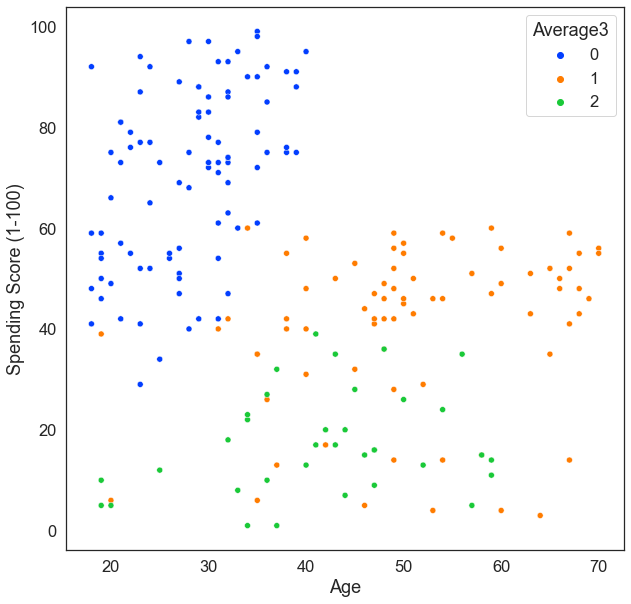

In [170]:
# Plot Average
plt.figure(figsize = (10, 10))
sns.set_context(context = 'notebook', font_scale=1.5)
sns.scatterplot(
    x = 'Age', 
    y = 'Spending Score', 
    hue = 'Average3',
    data = df,
    palette='bright')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

## **DBScan**

**Optimizing epsilon & min_samples**

In [182]:


for eps in [i/10 for i in range(5,10)]:
  for min_samples in range(3,10):
    print("\neps={}".format(eps))
    print("min_samples={}".format(min_samples))
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled,labels)
    silh = silhouette_score(X_scaled, labels)
    print("Clusters present: {}".format(np.unique(labels)))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))
    print("Silhouette Score: {}".format(silh))


eps=0.5
min_samples=3
Clusters present: [-1  0  1  2  3  4  5  6  7]
Cluster sizes: [32 18 90  4 34 10  4  5  3]
Silhouette Score: 0.131576280260958

eps=0.5
min_samples=4
Clusters present: [-1  0  1  2  3  4  5  6  7]
Cluster sizes: [39 18  6  4 83 34  4  8  4]
Silhouette Score: 0.11221109813130611

eps=0.5
min_samples=5
Clusters present: [-1  0  1  2  3  4  5]
Cluster sizes: [60 17  5 51 28 32  7]
Silhouette Score: 0.18451372756506046

eps=0.5
min_samples=6
Clusters present: [-1  0  1  2  3  4]
Cluster sizes: [66 16 50 29 32  7]
Silhouette Score: 0.2073279591655691

eps=0.5
min_samples=7
Clusters present: [-1  0  1  2  3]
Cluster sizes: [79 14 48 29 30]
Silhouette Score: 0.2236154132178232

eps=0.5
min_samples=8
Clusters present: [-1  0  1  2  3  4]
Cluster sizes: [92 12 36 22  9 29]
Silhouette Score: 0.12053948615096623

eps=0.5
min_samples=9
Clusters present: [-1  0  1  2  3]
Cluster sizes: [103  10  36  22  29]
Silhouette Score: 0.10921796693579347

eps=0.6
min_samples=3
Clusters

### **Interpretation**

From the various combinations of epsilon and min_samples, there are 2 best options to choose from:
- eps = 0.5 & min_samples = 4, silhouette score 0.2512, 2 clusters, no noise.
- eps = 0.3 & min_samples = 4, silhouette score 0.2694, 7 clusters, there is noise.

In the first option, the data clustering in the 2 existing clusters is very unequal, so the segmentation results are still very general.

In the second option, even though there are 9 noises, it is likely that better customer segmentation results will be obtained. To be able to check it, we can look at the scatter plot.

In [183]:
# Fit DBScan
dbscan = DBSCAN(eps=0.3, min_samples=4)
clusters_dbs = dbscan.fit_predict(X_scaled)

print('cluster: \n',clusters_dbs)

cluster: 
 [-1  0 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1
 -1 -1  1 -1 -1 -1  1  1  1  2 -1  1  2  3  2 -1  2  3 -1  2  3 -1  2  1
  2  2  2  3 -1 -1  3  1  2 -1 -1  1  3  1 -1  3 -1  1  4  5  1 -1 -1  3
  1  3  1  5  5  1  4  3  1  5  4 -1  4  4  4  5 -1  5  5  5  4  1 -1  1
  3 -1 -1 -1 -1  6 -1 -1 -1  6 -1  6 -1  6 -1  6 -1  6 -1  6 -1  6 -1  6
 -1 -1 -1  6 -1  6 -1 -1 -1  6 -1  6 -1  6 -1  6 -1  6 -1  6 -1 -1 -1  6
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [184]:
print('Silhouette score DBScan:', silhouette_score(X_scaled, clusters_dbs))

Silhouette score DBScan: -0.07961271839348515


In [185]:
df['DBScan'] = dbscan.labels_
df.head(10)

,Age,Spending Score,clusters,Ward2,Complete2,Average2,Ward3,Complete3,Average3,DBScan
0,19,39,0,1,0,0,0,1,1,-1
1,21,81,0,0,0,1,1,1,0,0
2,20,6,1,1,0,0,0,1,1,-1
3,23,77,0,0,0,1,1,1,0,0
4,31,40,0,1,0,0,0,1,1,-1
5,22,76,0,0,0,1,1,1,0,0
6,35,6,1,1,0,0,0,1,1,-1
7,23,94,0,0,0,1,1,1,0,-1
8,64,3,1,1,0,0,0,2,1,-1
9,30,72,0,0,0,1,1,1,0,-1


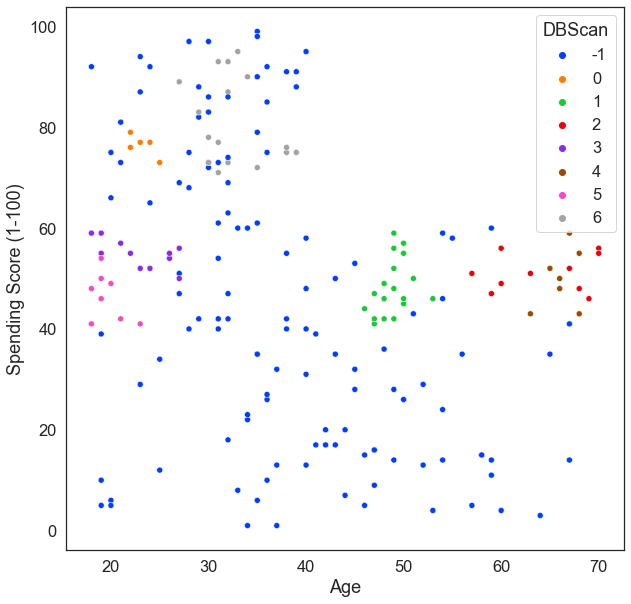

In [186]:
# DBScan
plt.figure(figsize = (10, 10))
sns.set_context(context = 'notebook', font_scale=1.5)
sns.scatterplot(
    x = 'Age', 
    y = 'Spending Score', 
    hue = 'DBScan',
    data = df,
    palette='bright')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)');

## **Summary**

In the case of customer segmentation using 2 features, namely 'Age' and 'Spending Score', it is found that the K-Means method produces the most optimal clustering results, when viewed from the silhouette score obtained. Based on the K-Means method, customers are only segmented into 2 different clusters, namely:

1. Cluster customers aged 18 to 40 years, whose spending scores vary from around 25 to 99.

2. The customer cluster is 18 to 70 years old and the highest spending score is only around 60.

It can be concluded that the first cluster is a cluster with customers ranging in age from teenagers to adults who shop or make transactions at the mall more often.